In [20]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

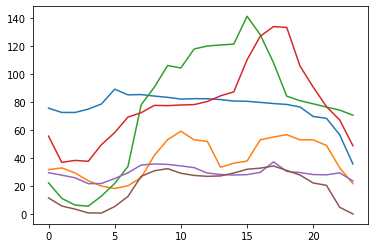

In [67]:
X = []
y = []
means = []
y1 = []
mat = []

for j in range(25,31):
    response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{12}-{j}")
    d = response.json()
    avgSum = []
    for k in d["SE1"]:
      X.append(k["price_sek"])
      avgSum.append(k["price_sek"])
      y.append(k["hour"])
    
    y1.append(j)
    means.append(sum(avgSum)/len(avgSum))
    mat.append(avgSum)
    plt.plot(avgSum)

<AxesSubplot:>

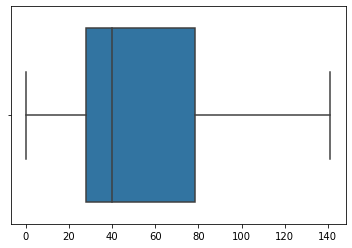

In [47]:
sns.boxplot(x=X)

<AxesSubplot:ylabel='Count'>

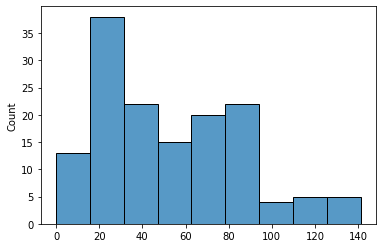

In [48]:
sns.histplot(x=X)

In [71]:
mat = np.array(mat).T
means = []

for i in mat:
    q75, q25 = np.percentile(i, [75 ,25])
    iqr = q75 - q25
    
    i = list(i)
    
    for j in i:
        if j > q75+iqr or j < q25-iqr:
            i.remove(j)
    
    i = np.array(i)
    means.append(np.mean(i))

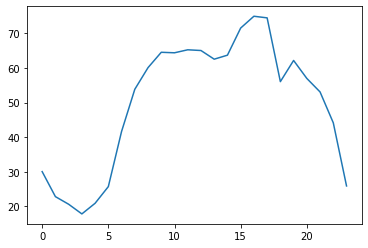

In [72]:
plt.plot(means)

In [69]:
X = np.array(mat).T
Xmean = []

for i in X:
    i = list(i)
    for j in i:
        if j > np.mean(np.array(i))+(np.std(np.array(i))*3) or j < np.mean(np.array(i))-(np.std(np.array(i))*3):
            i.remove(j)
    i = np.array(i)
    Xmean.append(np.mean(i))

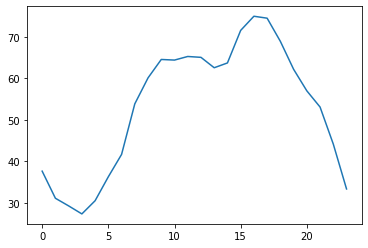

In [70]:
plt.plot(Xmean)

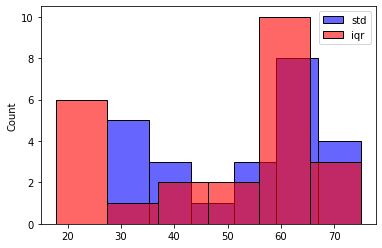

In [74]:
sns.histplot(x=Xmean, color="Blue", alpha=0.6, label="std")
sns.histplot(x=means, color="Red", alpha=0.6, label="iqr")
plt.legend()